# Exploracion datos ICFES

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Carga de Datos

In [3]:
df = pd.read_csv('Pacifico_cleaned.csv')

In [4]:
# Contar el número de observaciones (filas)
num_observations = len(df)

# Mostrar el resultado
print(f"El numero de observaciones es: {num_observations}")

El numero de observaciones es: 221336


In [5]:
col = df.columns
col

Index(['periodo', 'estu_consecutivo', 'cole_area_ubicacion', 'cole_calendario',
       'cole_naturaleza', 'estu_genero', 'fami_cuartoshogar',
       'fami_estratovivienda', 'fami_personashogar', 'fami_tieneautomovil',
       'fami_tienecomputador', 'fami_tieneinternet', 'fami_tienelavadora',
       'punt_ingles', 'punt_matematicas', 'punt_sociales_ciudadanas',
       'punt_c_naturales', 'punt_lectura_critica', 'punt_global', 'edad',
       'caracter_ACADÉMICO', 'caracter_TÉCNICO', 'caracter_TÉCNICO/ACADÉMICO',
       'cole_depto_ubi_CAUCA', 'cole_depto_ubi_CHOCO', 'cole_depto_ubi_NARIÑO',
       'cole_depto_ubi_VALLE', 'generoCole_FEMENINO', 'generoCole_MASCULINO',
       'generoCole_MIXTO', 'jornada_COMPLETA', 'jornada_MAÑANA',
       'jornada_NOCHE', 'jornada_SABATINA', 'jornada_TARDE', 'jornada_UNICA',
       'madre_Educación profesional completa',
       'madre_Educación profesional incompleta', 'madre_Ninguno',
       'madre_No sabe', 'madre_Postgrado', 'madre_Primaria completa',


In [6]:
# Estadísticas descriptivas para las variables numéricas
descriptive_stats = df.describe()
print(descriptive_stats)

# Estadísticas descriptivas para las variables categóricas
categorical_stats = df.describe(include='object')
print(categorical_stats)


             periodo  cole_area_ubicacion  cole_calendario  cole_naturaleza  \
count  221336.000000        221336.000000    221336.000000    221336.000000   
mean    20151.918992             0.804320         0.989496         0.833552   
std         8.185133             0.396724         0.101951         0.372483   
min     20142.000000             0.000000         0.000000         0.000000   
25%     20142.000000             1.000000         1.000000         1.000000   
50%     20152.000000             1.000000         1.000000         1.000000   
75%     20162.000000             1.000000         1.000000         1.000000   
max     20162.000000             1.000000         1.000000         1.000000   

         estu_genero  fami_cuartoshogar  fami_estratovivienda  \
count  221336.000000      221336.000000         221336.000000   
mean        0.433992           2.927694              1.548524   
std         0.495625           1.092283              0.757212   
min         0.000000        

## Histogramas

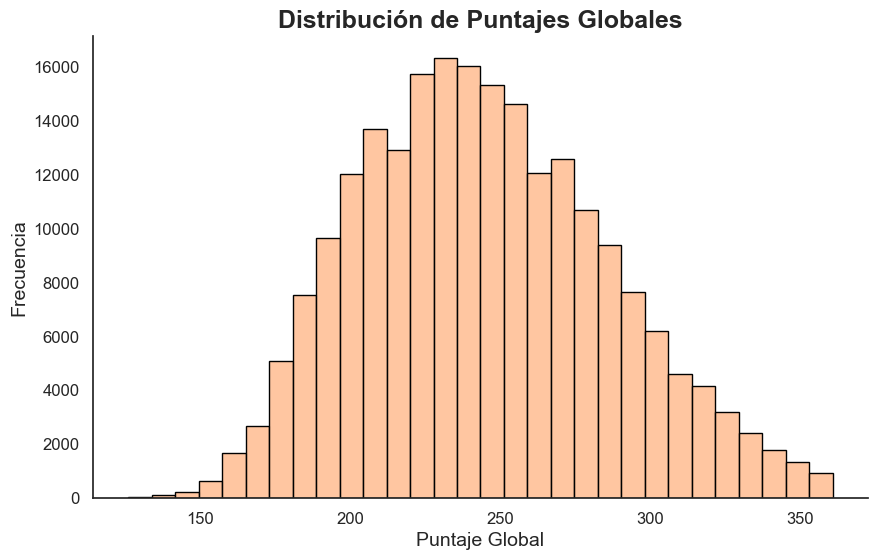

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configuración de estilo para una presentación corporativa
sns.set(style="white")

# Crear la figura y ajustar el tamaño
plt.figure(figsize=(10, 6))

# Colores personalizados
custom_palette = sns.color_palette("pastel")

# Crear el histograma con colores personalizados y bordes
sns.histplot(df['punt_global'], bins=30, color=custom_palette[1], edgecolor='black', kde=False)

# Títulos y etiquetas en español
plt.title('Distribución de Puntajes Globales', fontsize=18, weight='bold')
plt.xlabel('Puntaje Global', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)

# Ajustar el tamaño de las etiquetas de los ejes
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Eliminar el borde superior y derecho y la cuadrícula
sns.despine()
plt.grid(False)

# Mostrar el gráfico
plt.show()


El puntaje medio de CAUCA es 235.2950417157317
El puntaje medio de CHOCO es 218.2130873883649
El puntaje medio de NARIÑO es 250.47594838498918
El puntaje medio de VALLE es 247.73978948067472


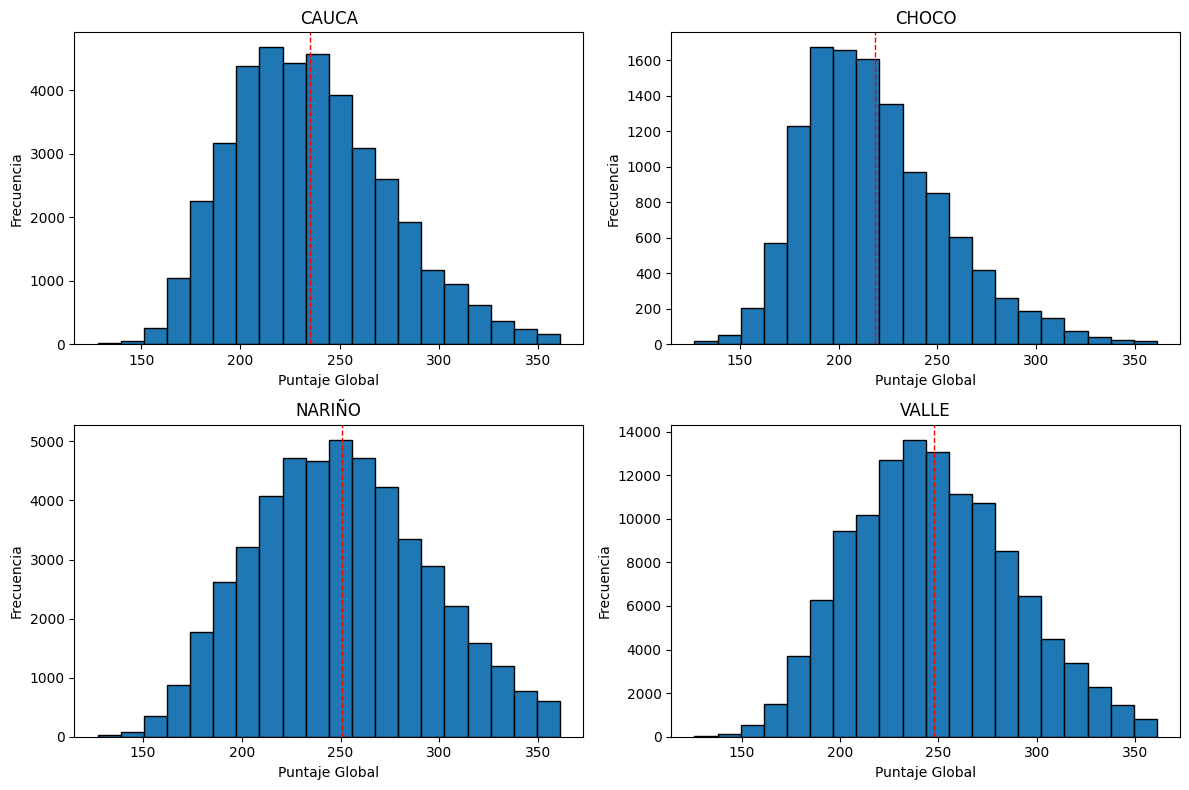

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Crear una columna categórica 'departamento' basada en las variables binarias
df_nuevo = df.copy()
df_nuevo['departamento'] = df_nuevo.apply(
    lambda row: 'CAUCA' if row['cole_depto_ubi_CAUCA'] == 1 else
                'CHOCO' if row['cole_depto_ubi_CHOCO'] == 1 else
                'NARIÑO' if row['cole_depto_ubi_NARIÑO'] == 1 else
                'VALLE' if row['cole_depto_ubi_VALLE'] == 1 else
                'Otros',
    axis=1
)

# Filtrar datos para los departamentos seleccionados
departamentos = ['CAUCA', 'CHOCO', 'NARIÑO', 'VALLE']
filtered_df = df_nuevo[df_nuevo['departamento'].isin(departamentos)]

# Calcular puntaje medio para cada departamento
for departamento in departamentos:
    dept_data = filtered_df[filtered_df['departamento'] == departamento]['punt_global']
    dept_mean = dept_data.mean()
    print(f'El puntaje medio de {departamento} es', dept_mean)

# Crear figura y subplots para histogramas
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
colors = sns.color_palette("pastel", 4)  # Colores pastel

# Crear histogramas para cada departamento
for i, departamento in enumerate(departamentos):
    dept_data = filtered_df[filtered_df['departamento'] == departamento]['punt_global']
    ax = axs[i//2, i%2]
    ax.hist(dept_data, bins=20, color=colors[i], edgecolor='black')
    ax.set_title(departamento)
    dept_mean = dept_data.mean()
    ax.axvline(dept_mean, color='red', linestyle='dashed', linewidth=2)  # Línea más visible
    ax.set_xlabel('Puntaje Global')
    ax.set_ylabel('Frecuencia')

# Ajustar espaciado entre subplots
plt.tight_layout()

# Mostrar el gráfico
plt.show()


In [13]:
import pandas as pd

# Suponiendo que df_nuevo es tu DataFrame con la columna 'departamento'
df_nuevo = df.copy()
df_nuevo['departamento'] = df_nuevo.apply(
    lambda row: 'CAUCA' if row['cole_depto_ubi_CAUCA'] == 1 else
                'CHOCO' if row['cole_depto_ubi_CHOCO'] == 1 else
                'NARIÑO' if row['cole_depto_ubi_NARIÑO'] == 1 else
                'VALLE' if row['cole_depto_ubi_VALLE'] == 1 else
                'Otros',
    axis=1
)

# Calcular el porcentaje de datos para cada departamento
department_counts = df_nuevo['departamento'].value_counts(normalize=True) * 100

# Mostrar el porcentaje de datos para cada departamento
print(department_counts)


departamento
VALLE     54.425850
NARIÑO    22.128348
CAUCA     18.032765
CHOCO      5.413037
Name: proportion, dtype: float64


/var/folders/rk/1txw87pj7sgdsrd0ny5897580000gn/T/ipykernel_59106/1695108183.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='departamento', y='punt_global', data=filtered_df, palette='muted')


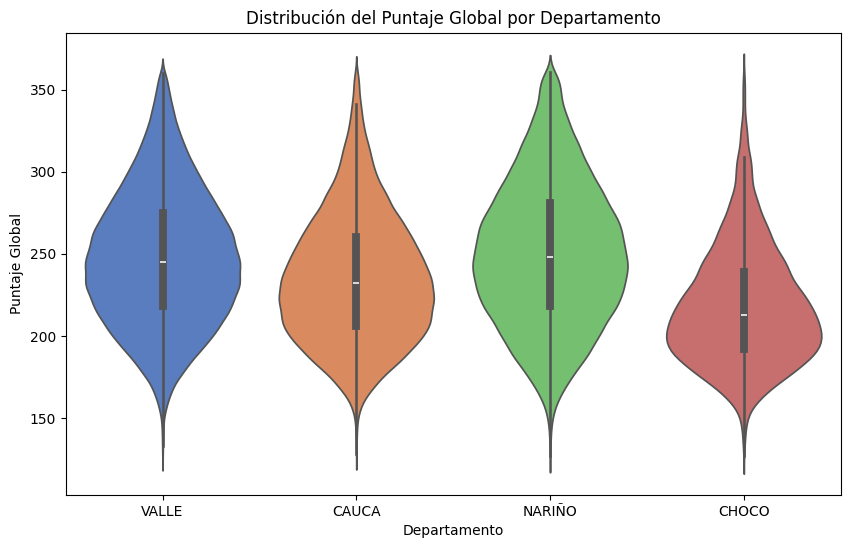

In [ ]:

# Crear un diagrama de violín para la distribución del puntaje global por departamento
plt.figure(figsize=(10, 6))
sns.violinplot(x='departamento', y='punt_global', data=filtered_df, palette='muted')

# Configurar el título y las etiquetas
plt.title('Distribución del Puntaje Global por Departamento')
plt.xlabel('Departamento')
plt.ylabel('Puntaje Global')

# Mostrar el gráfico
plt.show()


## Diagramas de Caja por puntajes

In [ ]:
# Variables numéricas
numerical_vars = ['punt_ingles', 'punt_matematicas', 'punt_sociales_ciudadanas',
                  'punt_c_naturales', 'punt_lectura_critica', 'punt_global', 'edad']

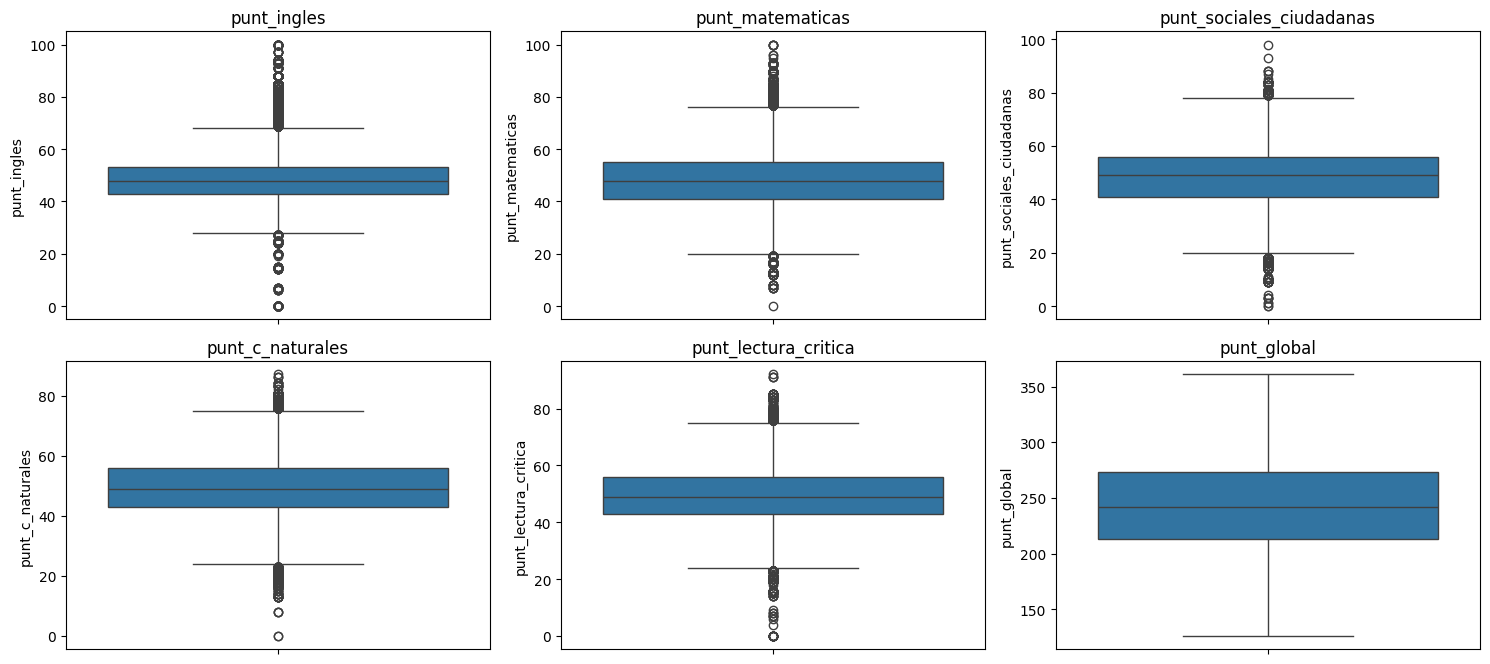

In [ ]:
# Crear diagramas de caja para las variables numéricas
plt.figure(figsize=(15, 10))
for i, var in enumerate(numerical_vars[:-1], 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=df[var])
    plt.title(var)
plt.tight_layout()
plt.show()


## Distribución de los puntajes en función de la edad

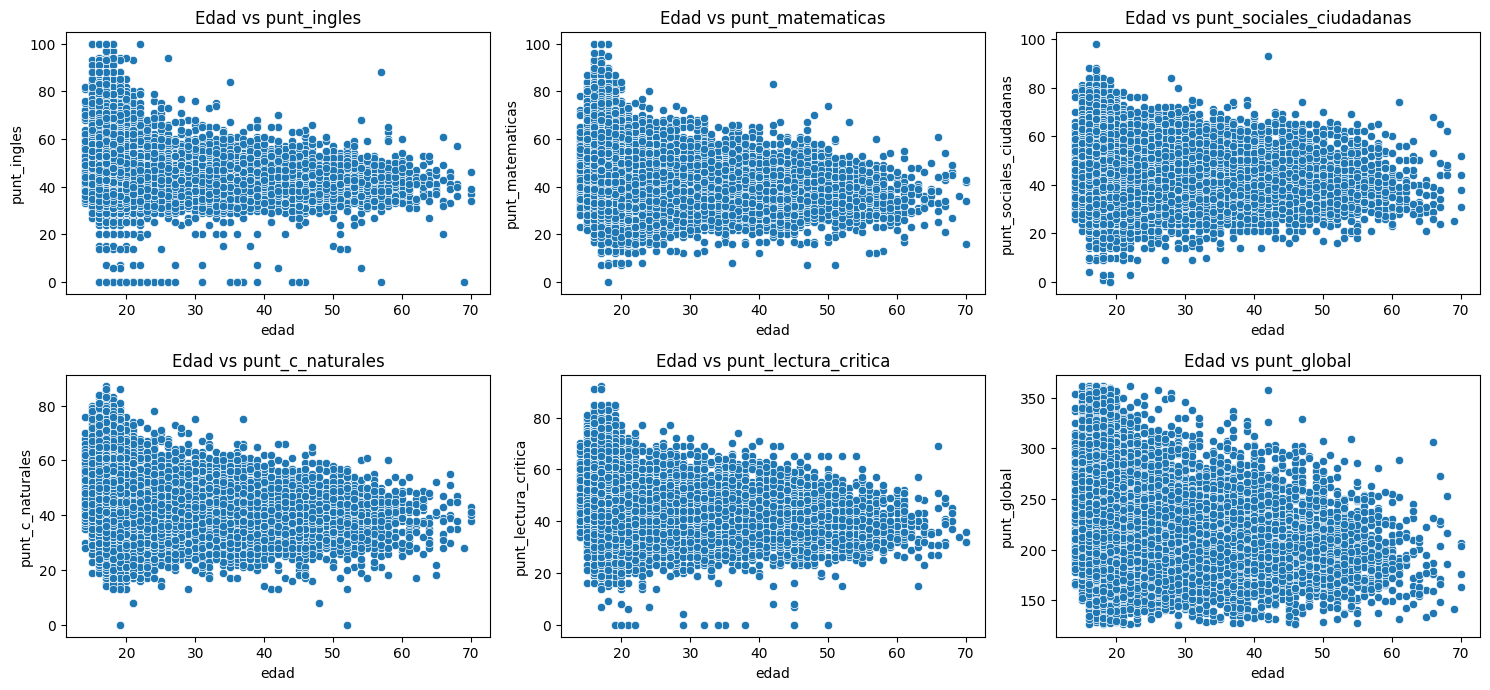

In [ ]:
# Ejemplo de diagrama de dispersión entre puntajes y edad
plt.figure(figsize=(15, 10))
for i, var in enumerate(numerical_vars[:-1], 1):  # Excluye 'edad'
    plt.subplot(3, 3, i)
    sns.scatterplot(x='edad', y=var, data=df)
    plt.title(f'Edad vs {var}')
plt.tight_layout()
plt.show()


## Distribución global por Caracter

Promedio de colegios ACADEMICOS: 243.92895589464882
Promedio de colegios TECNICOS: 242.67433425975204
Promedio de colegios ACADEMICOS/TECNICOS: 245.95609138944704


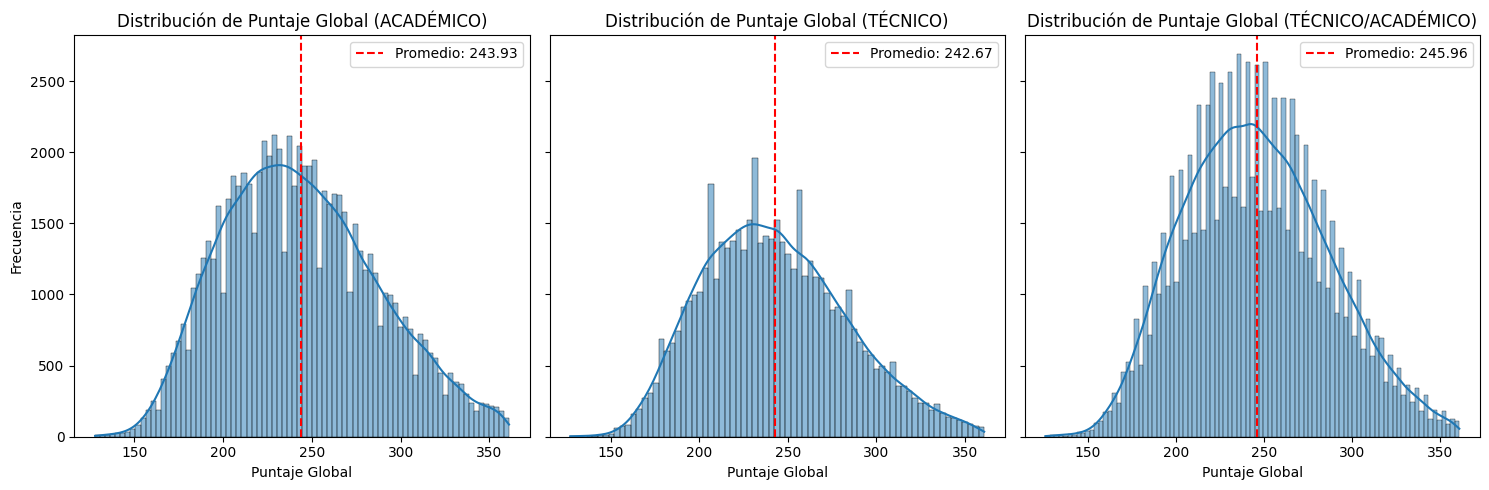

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Copiar el DataFrame original
df_nuevo = df.copy()

# Definir una función para asignar el carácter del colegio
def asignar_caracter(row):
    if row['caracter_ACADÉMICO'] == 1:
        return 'ACADÉMICO'
    elif row['caracter_TÉCNICO'] == 1:
        return 'TÉCNICO'
    elif row['caracter_TÉCNICO/ACADÉMICO'] == 1:
        return 'TÉCNICO/ACADÉMICO'
    else:
        return 'Otros'

# Aplicar la función a una nueva columna 'caracter_colegio'
df_nuevo['caracter_colegio'] = df_nuevo.apply(asignar_caracter, axis=1)

# Calcular los promedios de puntaje global para cada tipo de colegio
promedio_academico = df_nuevo[df_nuevo['caracter_colegio'] == 'ACADÉMICO']['punt_global'].mean()
promedio_tecnico = df_nuevo[df_nuevo['caracter_colegio'] == 'TÉCNICO']['punt_global'].mean()
promedio_tecnico_academico = df_nuevo[df_nuevo['caracter_colegio'] == 'TÉCNICO/ACADÉMICO']['punt_global'].mean()
print(f'Promedio de colegios ACADEMICOS:',promedio_academico)
print(f'Promedio de colegios TECNICOS:',promedio_tecnico)
print(f'Promedio de colegios ACADEMICOS/TECNICOS:',promedio_tecnico_academico)


# Crear subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

# Generar distribución de puntaje global para cada tipo de colegio
for i, caracter in enumerate(['ACADÉMICO', 'TÉCNICO', 'TÉCNICO/ACADÉMICO']):
    # Histograma
    sns.histplot(data=df_nuevo[df_nuevo['caracter_colegio'] == caracter], x='punt_global', ax=axs[i], kde=True)
    axs[i].set_title(f'Distribución de Puntaje Global ({caracter})')
    axs[i].set_xlabel('Puntaje Global')
    axs[i].set_ylabel('Frecuencia')
    
    # Línea vertical para el promedio
    if caracter == 'ACADÉMICO':
        axs[i].axvline(promedio_academico, color='r', linestyle='--', label=f'Promedio: {promedio_academico:.2f}')
    elif caracter == 'TÉCNICO':
        axs[i].axvline(promedio_tecnico, color='r', linestyle='--', label=f'Promedio: {promedio_tecnico:.2f}')
    else:
        axs[i].axvline(promedio_tecnico_academico, color='r', linestyle='--', label=f'Promedio: {promedio_tecnico_academico:.2f}')
    
    axs[i].legend()

# Ajustar espaciado
plt.tight_layout()

# Mostrar el gráfico
plt.show()


#### Significancia de diferencia entre colegios de diferente caracter.

In [ ]:
from scipy.stats import f_oneway

# Filtrar los puntajes globales para cada tipo de colegio
puntajes_academico = df_nuevo[df_nuevo['caracter_colegio'] == 'ACADÉMICO']['punt_global']
puntajes_tecnico = df_nuevo[df_nuevo['caracter_colegio'] == 'TÉCNICO']['punt_global']
puntajes_tecnico_academico = df_nuevo[df_nuevo['caracter_colegio'] == 'TÉCNICO/ACADÉMICO']['punt_global']

# Realizar ANOVA
f_statistic, p_value = f_oneway(puntajes_academico, puntajes_tecnico, puntajes_tecnico_academico)

# Imprimir resultados
print("Resultados del ANOVA:")
print(f"F-Statistic: {f_statistic}")
print(f"P-value: {p_value}")

# Interpretar el resultado
if p_value < 0.05:
    print("Hay diferencias significativas entre al menos dos grupos.")
else:
    print("No hay diferencias significativas entre los grupos.")


Resultados del ANOVA:
F-Statistic: 113.65868356742635
P-value: 4.613085944021988e-50
Hay diferencias significativas entre al menos dos grupos.


In [ ]:
from scipy.stats import ttest_ind

# Filtrar los puntajes globales para los colegios de carácter "ACADÉMICO" y "TÉCNICO"
puntajes_academico = df_nuevo[df_nuevo['caracter_colegio'] == 'ACADÉMICO']['punt_global']
puntajes_tecnico = df_nuevo[df_nuevo['caracter_colegio'] == 'TÉCNICO']['punt_global']

# Realizar la prueba t de Student independiente
t_statistic, p_value = ttest_ind(puntajes_academico, puntajes_tecnico)

# Imprimir resultados
print("Resultados de la prueba t de Student independiente:")
print(f"T-Statistic: {t_statistic}")
print(f"P-value: {p_value}")

# Interpretar el resultado
if p_value < 0.05:
    print("Hay una diferencia significativa entre los puntajes globales de colegios de carácter ACADÉMICO y TÉCNICO.")
else:
    print("No hay una diferencia significativa entre los puntajes globales de colegios de carácter ACADÉMICO y TÉCNICO.")


Resultados de la prueba t de Student independiente:
T-Statistic: 5.18872985224616
P-value: 2.1205703634871587e-07
Hay una diferencia significativa entre los puntajes globales de colegios de carácter ACADÉMICO y TÉCNICO.


## Naturaleza

In [ ]:
from scipy.stats import ttest_ind

# Filtrar los puntajes globales para los colegios Oficiales y no Oficiales
puntajes_oficiales = df_nuevo[df_nuevo['cole_naturaleza'] == 1]['punt_global']
puntajes_no_oficiales = df_nuevo[df_nuevo['cole_naturaleza'] == 0]['punt_global']

# Realizar la prueba t de Student independiente
t_statistic, p_value = ttest_ind(puntajes_oficiales, puntajes_no_oficiales)

# Imprimir resultados
print("Resultados de la prueba t de Student independiente:")
print(f"T-Statistic: {t_statistic}")
print(f"P-value: {p_value}")

# Interpretar el resultado
if p_value < 0.05:
    print("Hay una diferencia significativa entre los puntajes globales de colegios Oficiales y no Oficiales.")
else:
    print("No hay una diferencia significativa entre los puntajes globales de colegios Oficiales y no Oficiales.")
    
# Calcular promedios de puntajes globales por naturaleza del colegio
promedio_oficial = df_nuevo[df_nuevo['cole_naturaleza'] == 1]['punt_global'].mean()
promedio_no_oficial = df_nuevo[df_nuevo['cole_naturaleza'] == 0]['punt_global'].mean()

# Imprimir resultados
print("Promedio de puntajes globales por naturaleza del colegio:")
print(f"Oficial: {promedio_oficial:.2f}")
print(f"No Oficial: {promedio_no_oficial:.2f}")


Resultados de la prueba t de Student independiente:
T-Statistic: -14.299906225967142
P-value: 2.2980049271118175e-46
Hay una diferencia significativa entre los puntajes globales de colegios Oficiales y no Oficiales.
Promedio de puntajes globales por naturaleza del colegio:
Oficial: 243.94
No Oficial: 247.33


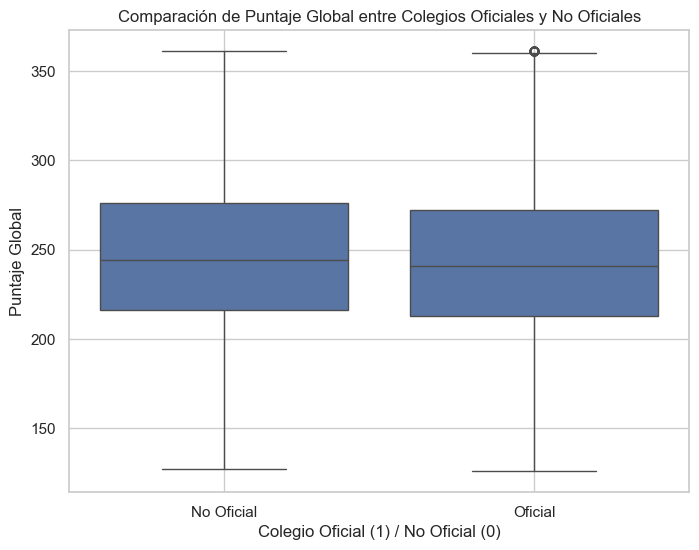

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un boxplot para comparar los puntajes globales entre colegios oficiales y no oficiales
plt.figure(figsize=(8, 6))
sns.boxplot(x='cole_naturaleza', y='punt_global', data=df_nuevo)
plt.xlabel('Colegio Oficial (1) / No Oficial (0)')
plt.ylabel('Puntaje Global')
plt.title('Comparación de Puntaje Global entre Colegios Oficiales y No Oficiales')
plt.xticks(ticks=[0, 1], labels=['No Oficial', 'Oficial'])
plt.grid(True)
plt.show()


In [23]:
# Calcular el promedio del puntaje global para colegios oficiales y no oficiales
promedio_oficial = df_nuevo[df_nuevo['cole_naturaleza'] == 1]['punt_global'].mean()
promedio_no_oficial = df_nuevo[df_nuevo['cole_naturaleza'] == 0]['punt_global'].mean()

print("Promedio de puntaje global para colegios oficiales:", promedio_oficial)
print("Promedio de puntaje global para colegios no oficiales:", promedio_no_oficial)

from scipy import stats

# Filtrar los puntajes globales para colegios oficiales y no oficiales
puntajes_oficial = df_nuevo[df_nuevo['cole_naturaleza'] == 1]['punt_global']
puntajes_no_oficial = df_nuevo[df_nuevo['cole_naturaleza'] == 0]['punt_global']

# Realizar el test t de Student para muestras independientes
t_statistic, p_value = stats.ttest_ind(puntajes_oficial, puntajes_no_oficial)

# Imprimir el resultado del test
print("Estadístico t:", t_statistic)
print("Valor p:", p_value)

# Interpretar el resultado del test
alpha = 0.05  # Nivel de significancia
if p_value < alpha:
    print("La diferencia es estadísticamente significativa (p < 0.05)")
else:
    print("No hay evidencia suficiente para rechazar la hipótesis nula (p >= 0.05)")



Promedio de puntaje global para colegios oficiales: 243.93770562887883
Promedio de puntaje global para colegios no oficiales: 247.33291713037104
Estadístico t: -14.299906225967142
Valor p: 2.2980049271118175e-46
La diferencia es estadísticamente significativa (p < 0.05)


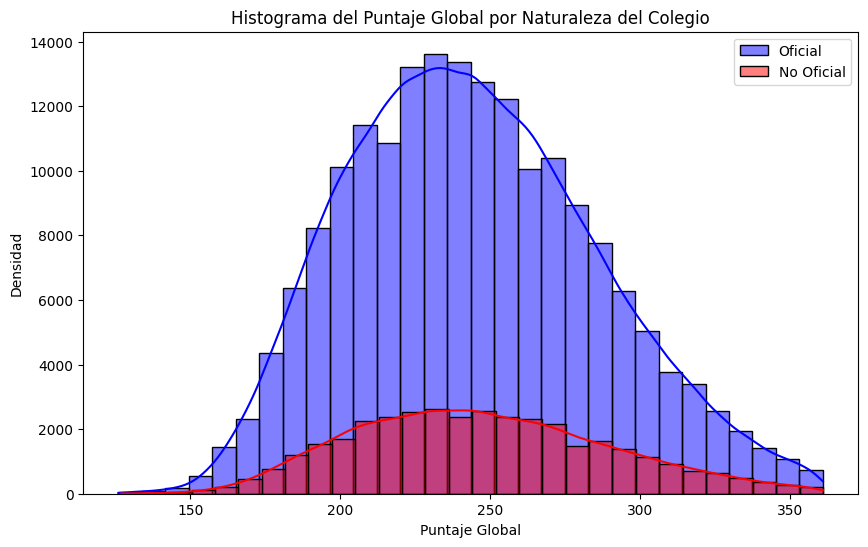

In [ ]:
import seaborn as sns

# Crear histogramas con KDE
plt.figure(figsize=(10, 6))
sns.histplot(puntajes_oficiales, bins=30, kde=True, color='blue', label='Oficial')
sns.histplot(puntajes_no_oficiales, bins=30, kde=True, color='red', label='No Oficial')
plt.xlabel('Puntaje Global')
plt.ylabel('Densidad')
plt.title('Histograma del Puntaje Global por Naturaleza del Colegio')
plt.legend()
plt.grid(False)
plt.show()


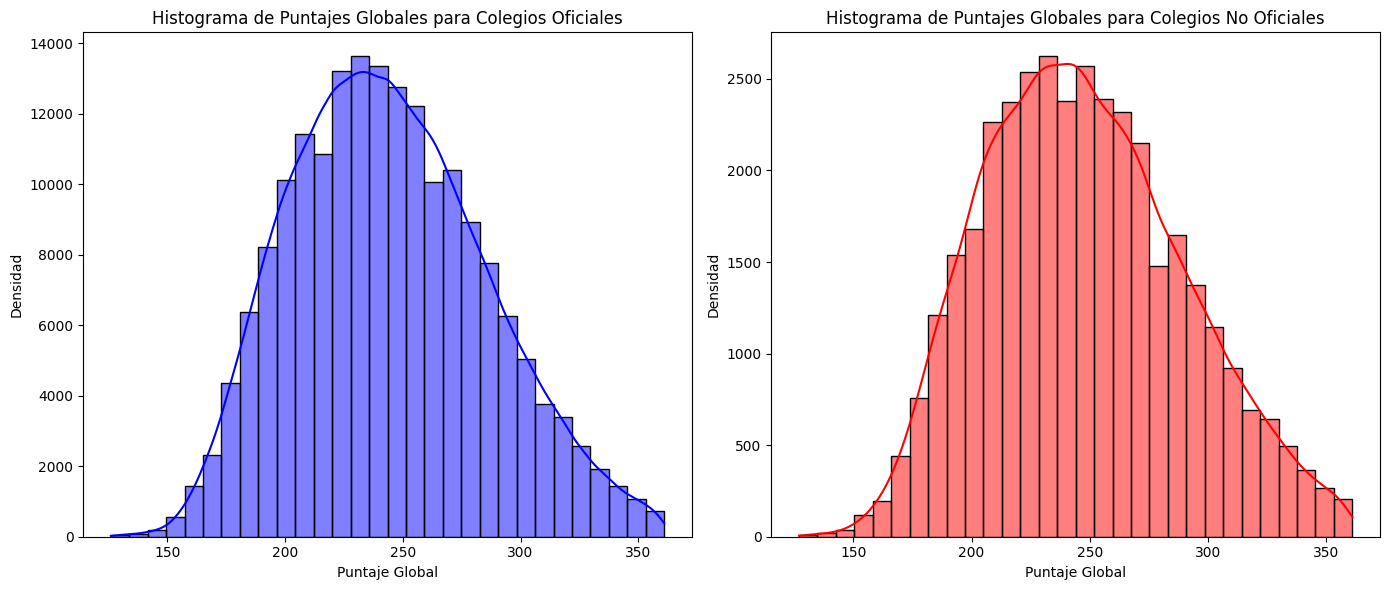

In [ ]:
# Crear subplots para los histogramas individuales
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Histograma para colegios oficiales
sns.histplot(puntajes_oficiales, bins=30, kde=True, color='blue', ax=axs[0])
axs[0].set_xlabel('Puntaje Global')
axs[0].set_ylabel('Densidad')
axs[0].set_title('Histograma de Puntajes Globales para Colegios Oficiales')

# Histograma para colegios no oficiales
sns.histplot(puntajes_no_oficiales, bins=30, kde=True, color='red', ax=axs[1])
axs[1].set_xlabel('Puntaje Global')
axs[1].set_ylabel('Densidad')
axs[1].set_title('Histograma de Puntajes Globales para Colegios No Oficiales')

# Ajustar espaciado
plt.tight_layout()
plt.show()


### Puntaje global por departamentos y naturaleza

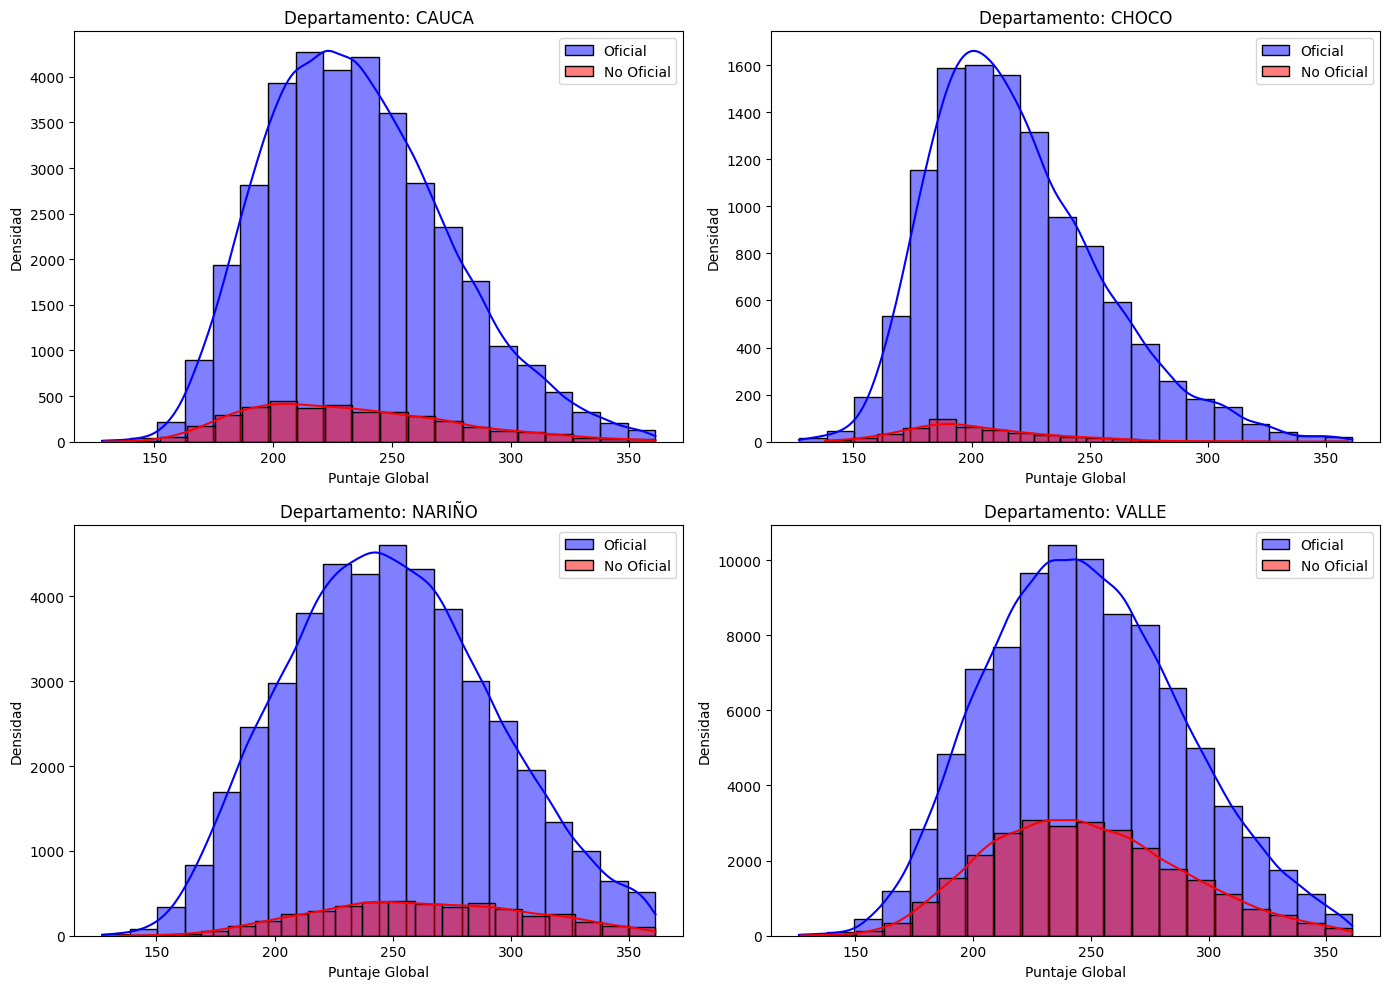

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear una columna categórica 'departamento' basada en las variables binarias
df_nuevo = df.copy()
df_nuevo['departamento'] = df_nuevo.apply(
    lambda row: 'CAUCA' if row['cole_depto_ubi_CAUCA'] == 1 else
                'CHOCO' if row['cole_depto_ubi_CHOCO'] == 1 else
                'NARIÑO' if row['cole_depto_ubi_NARIÑO'] == 1 else
                'VALLE' if row['cole_depto_ubi_VALLE'] == 1 else
                'Otros',
    axis=1
)

# Crear subplots
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Filtrar y plotear datos para cada departamento
for i, depto in enumerate(['CAUCA', 'CHOCO', 'NARIÑO', 'VALLE']):
    row = i // 2
    col = i % 2
    ax = axs[row, col]
    
    # Filtrar puntajes globales para colegios oficiales y no oficiales en el departamento actual
    puntajes_oficiales = df_nuevo[(df_nuevo['departamento'] == depto) & (df_nuevo['cole_naturaleza'] == 1)]['punt_global']
    puntajes_no_oficiales = df_nuevo[(df_nuevo['departamento'] == depto) & (df_nuevo['cole_naturaleza'] == 0)]['punt_global']
    
    # Plotear histogramas para puntajes globales de colegios oficiales y no oficiales en el departamento actual
    sns.histplot(puntajes_oficiales, bins=20, kde=True, color='blue', label='Oficial', ax=ax)
    sns.histplot(puntajes_no_oficiales, bins=20, kde=True, color='red', label='No Oficial', ax=ax)
    
    # Configuraciones del subplot
    ax.set_title(f'Departamento: {depto}')
    ax.set_xlabel('Puntaje Global')
    ax.set_ylabel('Densidad')
    ax.legend()

# Ajustar espaciado
plt.tight_layout()
plt.show()


## Correlacion

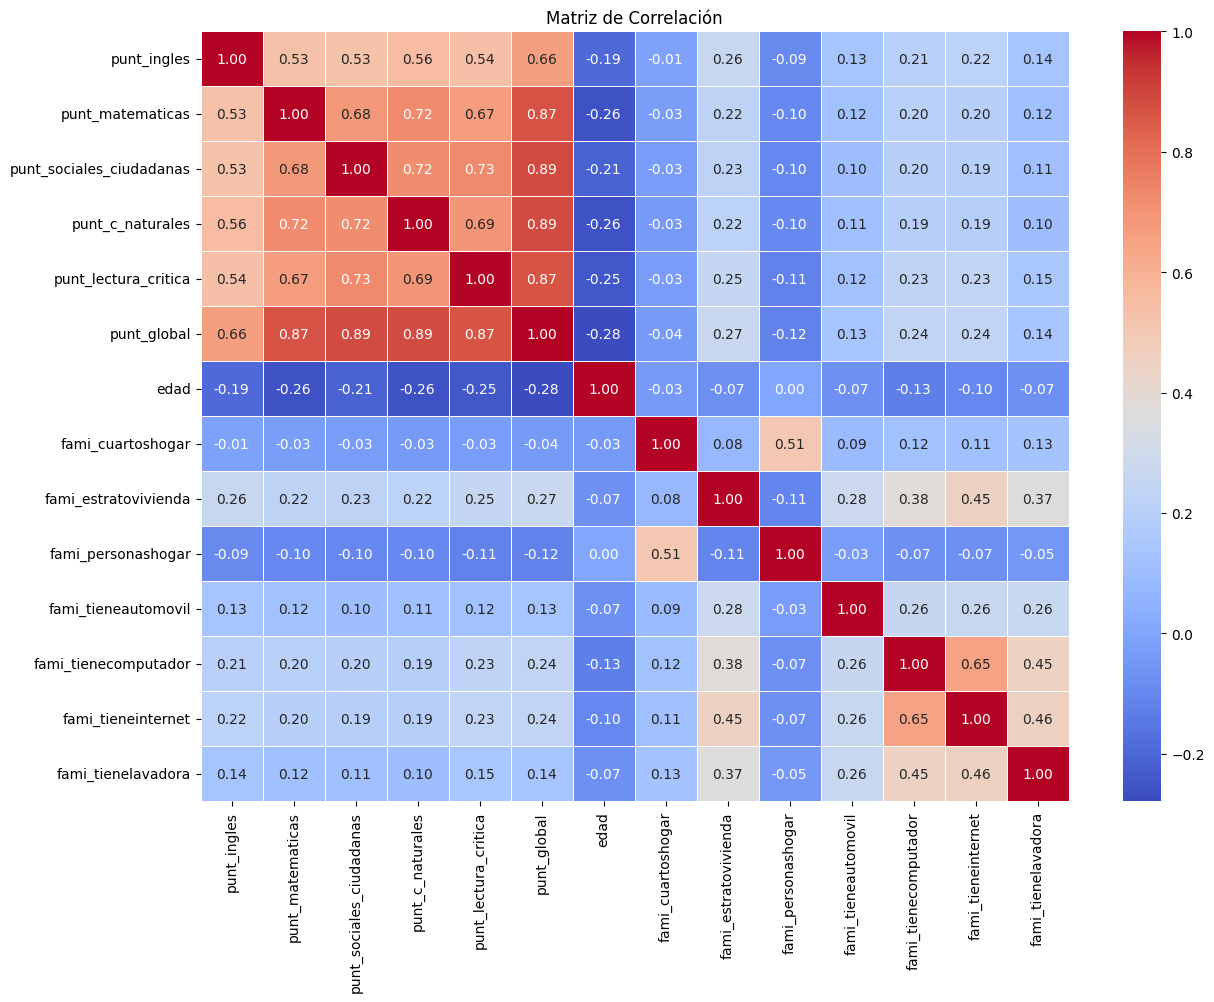

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Seleccionar las variables de interés para la matriz de correlación
variables_interes = ['punt_ingles', 'punt_matematicas', 'punt_sociales_ciudadanas',
                     'punt_c_naturales', 'punt_lectura_critica', 'punt_global', 'edad',
                     'fami_cuartoshogar', 'fami_estratovivienda', 'fami_personashogar',
                     'fami_tieneautomovil', 'fami_tienecomputador', 'fami_tieneinternet', 'fami_tienelavadora']

# Filtrar el DataFrame para incluir solo las variables seleccionadas
df_interes = df[variables_interes]

# Calcular la matriz de correlación
correlation_matrix = df_interes.corr()

# Crear un heatmap con la matriz de correlación
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Configurar el título y mostrar la gráfica
plt.title('Matriz de Correlación')
plt.show()


In [19]:
import pandas as pd

# Seleccionar las variables de interés
variables_interes = ['fami_tieneautomovil', 'fami_tienecomputador', 'fami_tieneinternet', 'fami_tienelavadora', 'punt_global']

# Filtrar el DataFrame para incluir solo las variables seleccionadas
df_interes = df[variables_interes]

# Calcular la matriz de correlación de Pearson
correlation_matrix = df_interes.corr(method='pearson')

# Extraer las correlaciones de las variables de interés con 'punt_global'
correlation_with_punt_global = correlation_matrix['punt_global'].drop('punt_global')

# Mostrar las correlaciones
print(correlation_with_punt_global)


fami_tieneautomovil     0.131360
fami_tienecomputador    0.238268
fami_tieneinternet      0.236184
fami_tienelavadora      0.140073
Name: punt_global, dtype: float64


## Educacion de los padres 

/var/folders/rk/1txw87pj7sgdsrd0ny5897580000gn/T/ipykernel_59106/4147445932.py:70: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=educacion_counts_madres, x='Educacion_Madre', y='Conteo', hue='Departamento', ci=None)


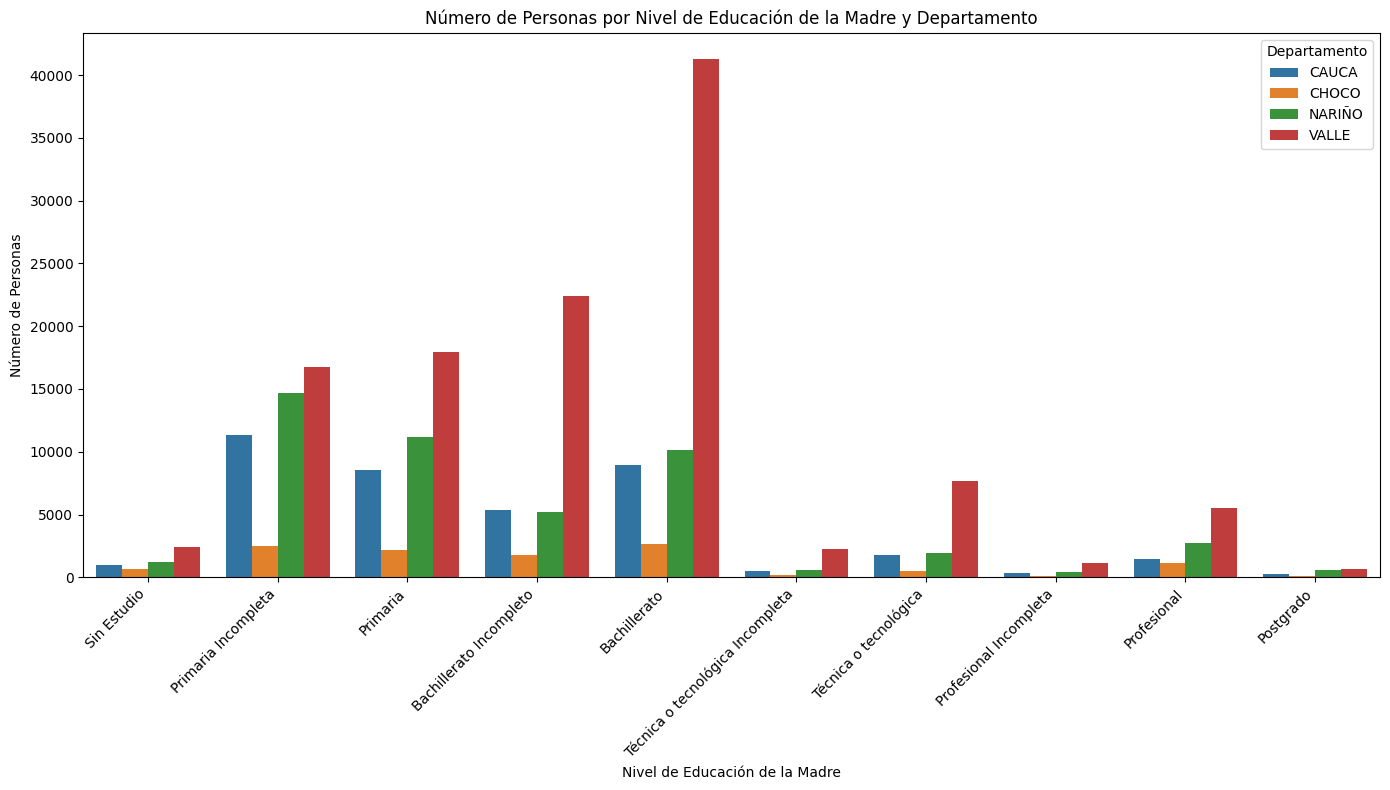

In [ ]:
# Listar todas las columnas que indican el nivel de educación de la madre
educacion_madre_cols = [
    'madre_Educación profesional completa',
    'madre_Educación profesional incompleta',
    'madre_Ninguno',
    'madre_No sabe',
    'madre_Postgrado',
    'madre_Primaria completa',
    'madre_Primaria incompleta',
    'madre_Secundaria (Bachillerato) completa',
    'madre_Secundaria (Bachillerato) incompleta',
    'madre_Técnica o tecnológica completa',
    'madre_Técnica o tecnológica incompleta'
]

educacion_madre_cols = [
    'madre_Educación profesional completa',
    'madre_Educación profesional incompleta',
    'madre_Ninguno',
    'madre_No sabe',
    'madre_Postgrado',
    'madre_Primaria completa',
    'madre_Primaria incompleta',
    'madre_Secundaria (Bachillerato) completa',
    'madre_Secundaria (Bachillerato) incompleta',
    'madre_Técnica o tecnológica completa',
    'madre_Técnica o tecnológica incompleta'
]

# Crear un DataFrame para contar las categorías de educación por departamento
educacion_counts_madres = df_nuevo.groupby('departamento')[educacion_madre_cols].sum().T

# Renombrar las etiquetas de educación
remplaza_madres = {
    'madre_Educación profesional completa': 'Profesional',
    'madre_Educación profesional incompleta': 'Profesional Incompleta',
    'madre_Ninguno': 'Sin Estudio',
    'madre_No sabe': 'No Sabe',
    'madre_Postgrado': 'Postgrado',
    'madre_Primaria completa': 'Primaria',
    'madre_Primaria incompleta': 'Primaria Incompleta',
    'madre_Secundaria (Bachillerato) completa': 'Bachillerato',
    'madre_Secundaria (Bachillerato) incompleta': 'Bachillerato Incompleto',
    'madre_Técnica o tecnológica completa': 'Técnica o tecnológica',
    'madre_Técnica o tecnológica incompleta': 'Técnica o tecnológica Incompleta'
}

educacion_counts_madres.rename(index=remplaza_madres, inplace=True)

# Eliminar la variable 'No Sabe'
educacion_counts_madres.drop('No Sabe', inplace=True)

# Ordenar las categorías de educación
orden_educacion = [
    'Sin Estudio', 'Primaria Incompleta', 'Primaria', 
    'Bachillerato Incompleto', 'Bachillerato', 
    'Técnica o tecnológica Incompleta', 'Técnica o tecnológica', 
    'Profesional Incompleta', 'Profesional', 'Postgrado'
]

educacion_counts_madres = educacion_counts_madres.loc[orden_educacion]

# Preparar los datos para el gráfico apilado
educacion_counts_madres.reset_index(inplace=True)
educacion_counts_madres = educacion_counts_madres.melt(id_vars='index', var_name='Departamento', value_name='Conteo')
educacion_counts_madres.rename(columns={'index': 'Educacion_Madre'}, inplace=True)

# Crear el gráfico de barras apiladas
plt.figure(figsize=(14, 8))
sns.barplot(data=educacion_counts_madres, x='Educacion_Madre', y='Conteo', hue='Departamento', ci=None)

# Configurar el gráfico
plt.xticks(rotation=45, ha='right')
plt.xlabel('Nivel de Educación de la Madre')
plt.ylabel('Número de Personas')
plt.title('Número de Personas por Nivel de Educación de la Madre y Departamento')
plt.legend(title='Departamento')

# Mostrar el gráfico
plt.tight_layout()
plt.show()


/var/folders/rk/1txw87pj7sgdsrd0ny5897580000gn/T/ipykernel_59106/845493001.py:56: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=educacion_counts_padres, x='Educacion_Padre', y='Conteo', hue='Departamento', ci=None)


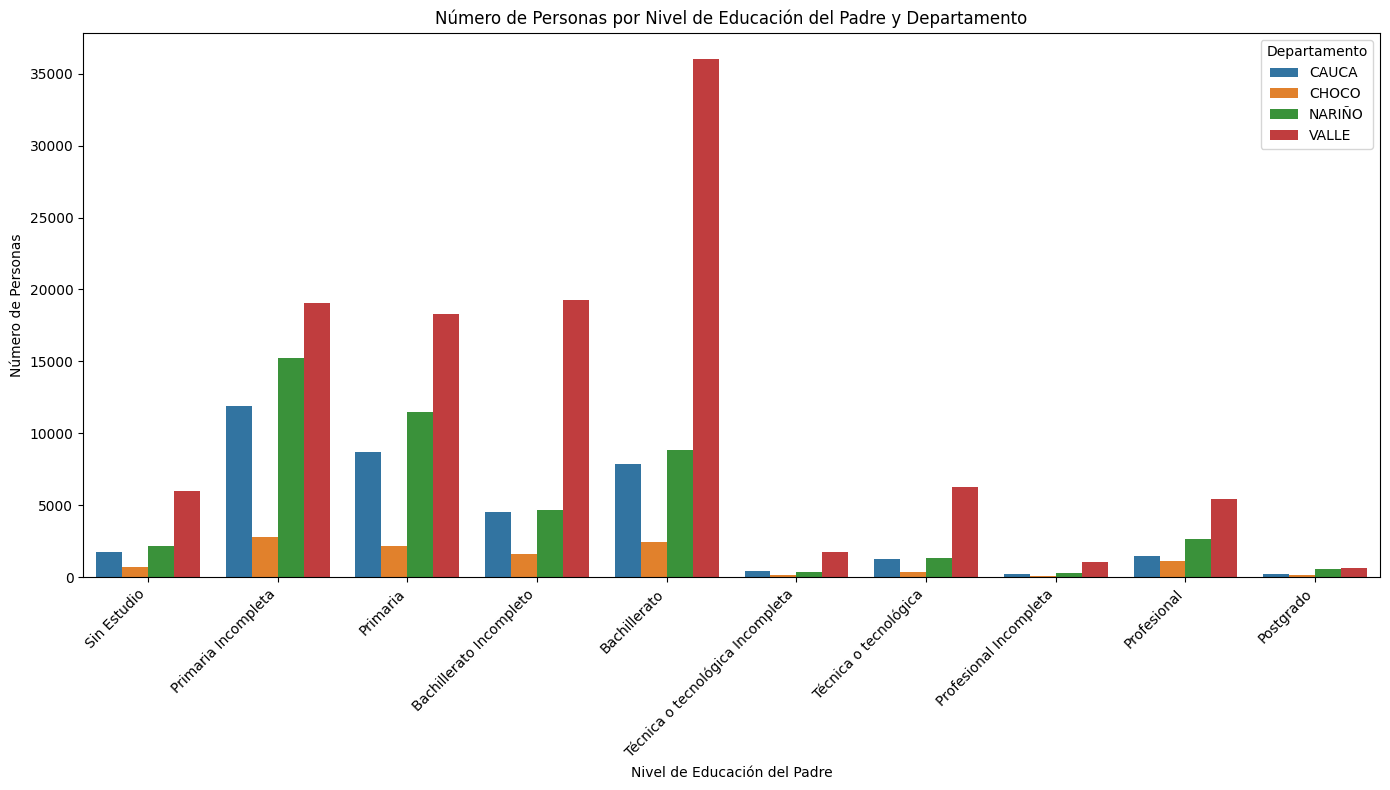

In [ ]:
# Listar todas las columnas que indican el nivel de educación del padre
educacion_padre_cols = [
    'padre_Educación profesional completa',
    'padre_Educación profesional incompleta',
    'padre_Ninguno',
    'padre_No sabe',
    'padre_Postgrado',
    'padre_Primaria completa',
    'padre_Primaria incompleta',
    'padre_Secundaria (Bachillerato) completa',
    'padre_Secundaria (Bachillerato) incompleta',
    'padre_Técnica o tecnológica completa',
    'padre_Técnica o tecnológica incompleta'
]

# Crear un DataFrame para contar las categorías de educación por departamento
educacion_counts_padres = df_nuevo.groupby('departamento')[educacion_padre_cols].sum().T

# Renombrar las etiquetas de educación
remplaza_padres = {
    'padre_Educación profesional completa': 'Profesional',
    'padre_Educación profesional incompleta': 'Profesional Incompleta',
    'padre_Ninguno': 'Sin Estudio',
    'padre_No sabe': 'No Sabe',
    'padre_Postgrado': 'Postgrado',
    'padre_Primaria completa': 'Primaria',
    'padre_Primaria incompleta': 'Primaria Incompleta',
    'padre_Secundaria (Bachillerato) completa': 'Bachillerato',
    'padre_Secundaria (Bachillerato) incompleta': 'Bachillerato Incompleto',
    'padre_Técnica o tecnológica completa': 'Técnica o tecnológica',
    'padre_Técnica o tecnológica incompleta': 'Técnica o tecnológica Incompleta'
}

educacion_counts_padres.rename(index=remplaza_padres, inplace=True)

# Eliminar la variable 'No Sabe'
educacion_counts_padres.drop('No Sabe', inplace=True)

# Ordenar las categorías de educación
orden_educacion = [
    'Sin Estudio', 'Primaria Incompleta', 'Primaria', 
    'Bachillerato Incompleto', 'Bachillerato', 
    'Técnica o tecnológica Incompleta', 'Técnica o tecnológica', 
    'Profesional Incompleta', 'Profesional', 'Postgrado'
]

educacion_counts_padres = educacion_counts_padres.loc[orden_educacion]

# Preparar los datos para el gráfico apilado
educacion_counts_padres.reset_index(inplace=True)
educacion_counts_padres = educacion_counts_padres.melt(id_vars='index', var_name='Departamento', value_name='Conteo')
educacion_counts_padres.rename(columns={'index': 'Educacion_Padre'}, inplace=True)

# Crear el gráfico de barras apiladas
plt.figure(figsize=(14, 8))
sns.barplot(data=educacion_counts_padres, x='Educacion_Padre', y='Conteo', hue='Departamento', ci=None)

# Configurar el gráfico
plt.xticks(rotation=45, ha='right')
plt.xlabel('Nivel de Educación del Padre')
plt.ylabel('Número de Personas')
plt.title('Número de Personas por Nivel de Educación del Padre y Departamento')
plt.legend(title='Departamento')

# Mostrar el gráfico
plt.tight_layout()
plt.show()


## Estrato

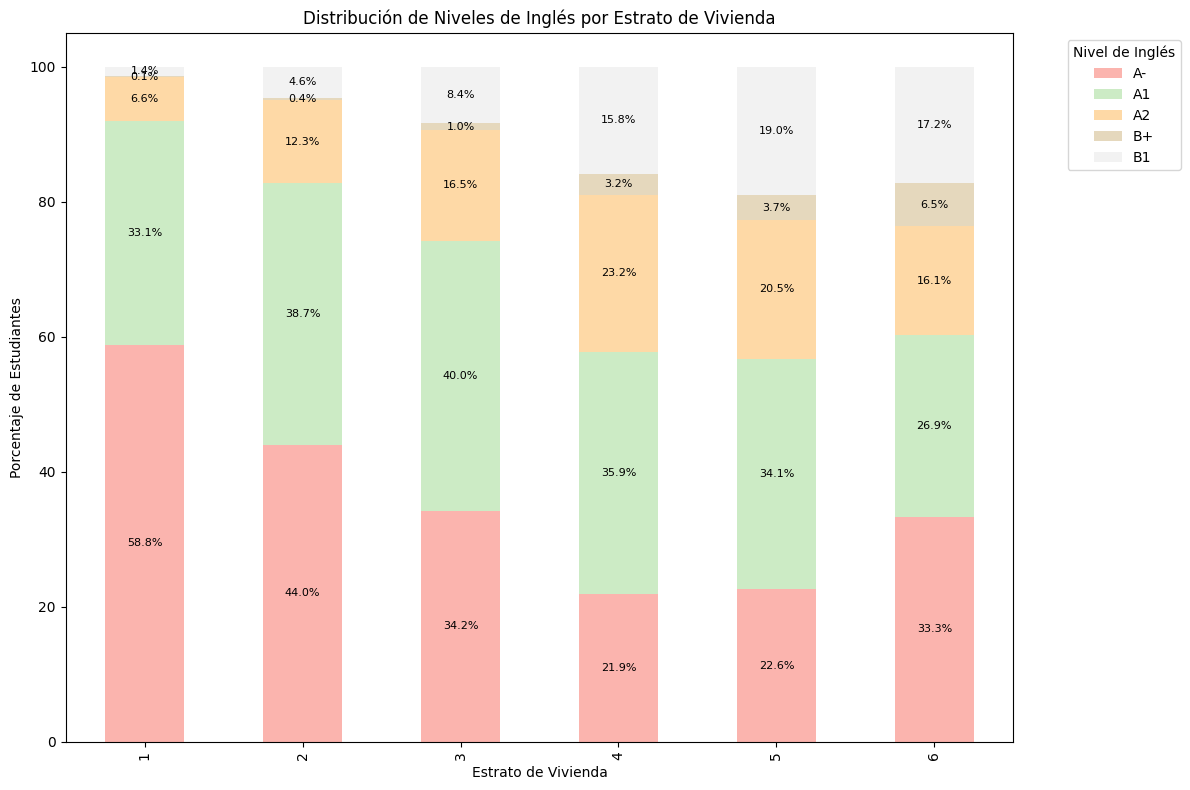

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Crear una copia del DataFrame original
df_nuevo = df.copy()

# Crear una columna de nivel de inglés basada en las columnas de nivel de inglés
df_nuevo['nivel_ingles'] = df_nuevo[['nivel_ing_A-', 'nivel_ing_A1', 'nivel_ing_A2', 'nivel_ing_B1','nivel_ing_B+']].idxmax(axis=1)

# Diccionario para renombrar los niveles de inglés
nivel_ingles_remplazo = {
    'nivel_ing_A-': 'A-',
    'nivel_ing_A1': 'A1',
    'nivel_ing_A2': 'A2',
    'nivel_ing_B1': 'B1',
    'nivel_ing_B+': 'B+'
}
df_nuevo['nivel_ingles'] = df_nuevo['nivel_ingles'].replace(nivel_ingles_remplazo)

# Agrupar por estrato y nivel de inglés y contar las ocurrencias
estrato_ingles = df_nuevo.groupby(['fami_estratovivienda', 'nivel_ingles']).size().unstack().fillna(0)

# Convertir los valores a porcentajes
estrato_ingles_percentage = estrato_ingles.div(estrato_ingles.sum(axis=1), axis=0) * 100

# Crear el gráfico de barras apiladas con porcentajes
ax = estrato_ingles_percentage.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='Pastel1')

# Añadir etiquetas de porcentaje a cada barra
for c in ax.containers:
    labels = [f'{v.get_height():.1f}%' if v.get_height() > 0 else '' for v in c]
    ax.bar_label(c, labels=labels, label_type='center', fontsize=8)

# Configurar el gráfico
plt.xlabel('Estrato de Vivienda')
plt.ylabel('Porcentaje de Estudiantes')
plt.title('Distribución de Niveles de Inglés por Estrato de Vivienda')
plt.legend(title='Nivel de Inglés', bbox_to_anchor=(1.05, 1), loc='upper left')

# Ajustar diseño
plt.tight_layout()

# Mostrar el gráfico
plt.show()


/var/folders/rk/1txw87pj7sgdsrd0ny5897580000gn/T/ipykernel_59106/1105741602.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  estrato_departamento[col] = estrato_departamento[col].astype(bool)
/var/folders/rk/1txw87pj7sgdsrd0ny5897580000gn/T/ipykernel_59106/1105741602.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  estrato_departamento[col] = estrato_departamento[col].astype(bool)
/var/folders/rk/1txw87pj7sgdsrd0ny5897580000gn/T/ipykernel_59106/1105741602.py:15: SettingWithCopyWarning: 
A value is t

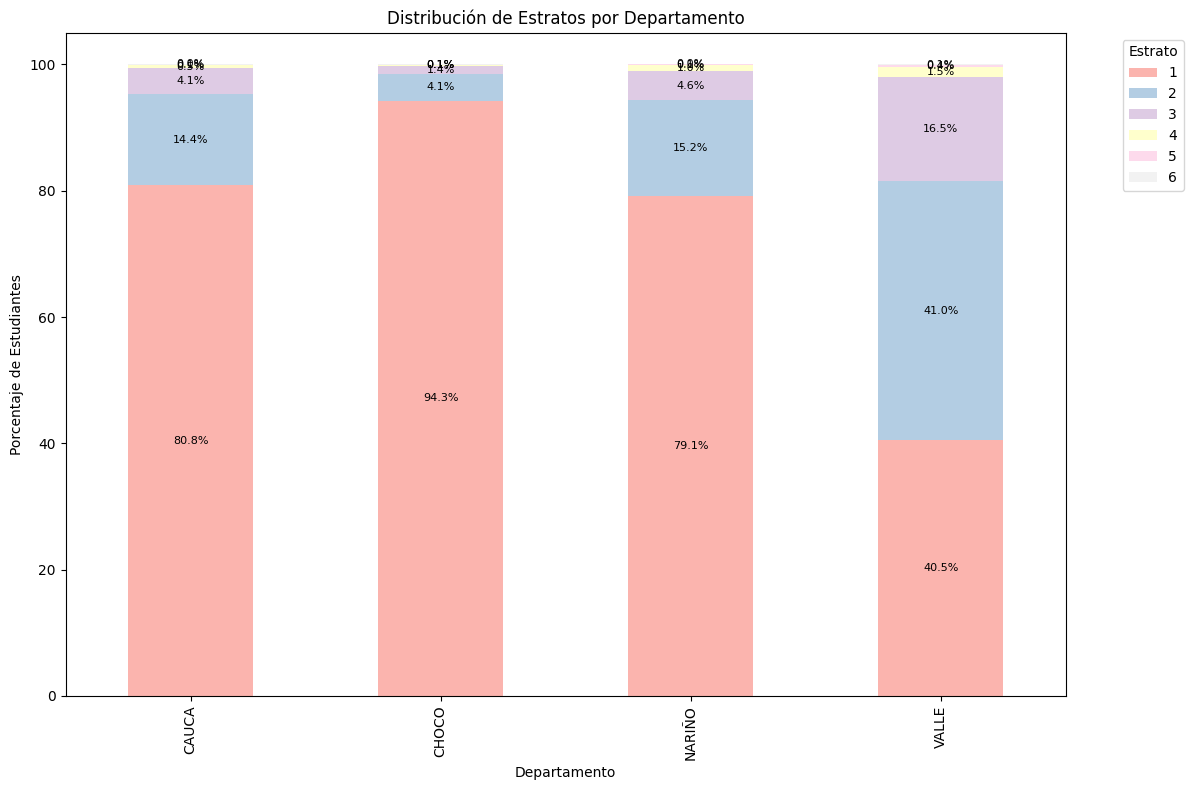

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Crear una copia del DataFrame original
df_nuevo = df.copy()

# Filtrar solo las columnas relevantes para los departamentos y los estratos de vivienda
estrato_departamento = df_nuevo[['cole_depto_ubi_CAUCA', 'cole_depto_ubi_CHOCO', 'cole_depto_ubi_NARIÑO', 'cole_depto_ubi_VALLE', 'fami_estratovivienda']]

# Renombrar las columnas de los departamentos
estrato_departamento.columns = ['CAUCA', 'CHOCO', 'NARIÑO', 'VALLE', 'Estrato']

# Convertir las columnas de los departamentos a valores booleanos
for col in ['CAUCA', 'CHOCO', 'NARIÑO', 'VALLE']:
    estrato_departamento[col] = estrato_departamento[col].astype(bool)

# Agrupar por departamento y estrato de vivienda y contar las ocurrencias
estrato_departamento = estrato_departamento.groupby(['Estrato']).sum().T

# Convertir los valores a porcentajes
estrato_departamento_percentage = estrato_departamento.div(estrato_departamento.sum(axis=1), axis=0) * 100

# Crear el gráfico de barras apiladas con porcentajes y un colormap suave
ax = estrato_departamento_percentage.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='Pastel1')

# Añadir etiquetas de porcentaje a cada barra
for c in ax.containers:
    labels = [f'{v.get_height():.1f}%' if v.get_height() > 0 else '' for v in c]
    ax.bar_label(c, labels=labels, label_type='center', fontsize=8)

# Configurar el gráfico
plt.xlabel('Departamento')
plt.ylabel('Porcentaje de Estudiantes')
plt.title('Distribución de Estratos por Departamento')
plt.legend(title='Estrato', bbox_to_anchor=(1.05, 1), loc='upper left')

# Ajustar diseño
plt.tight_layout()

# Mostrar el gráfico
plt.show()


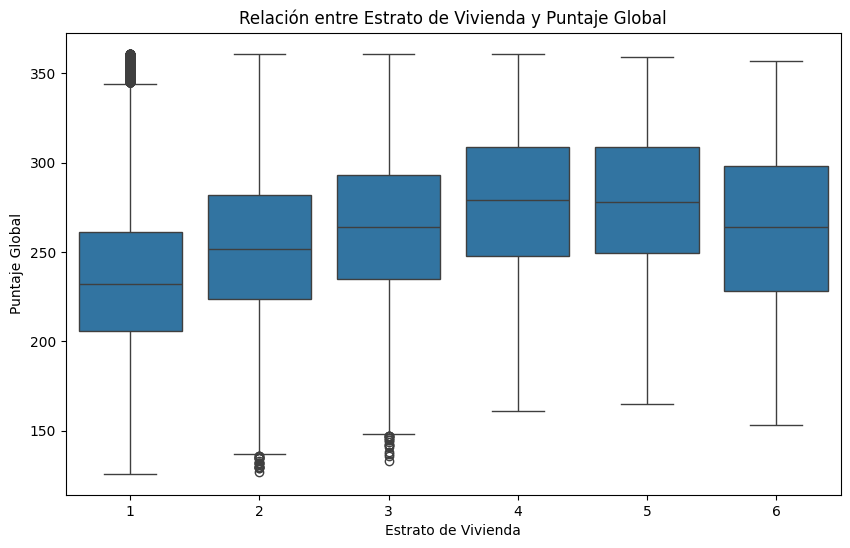

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear el gráfico de caja
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='fami_estratovivienda', y='punt_global')

# Configurar el gráfico
plt.xlabel('Estrato de Vivienda')
plt.ylabel('Puntaje Global')
plt.title('Relación entre Estrato de Vivienda y Puntaje Global')

# Mostrar el gráfico
plt.show()


## Colegio Genero

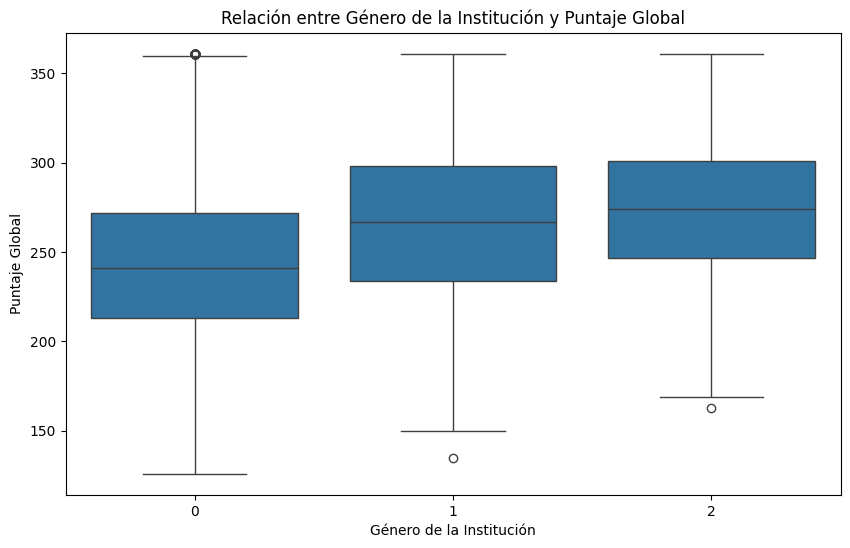

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear una nueva variable que represente el género de la institución educativa
# 0 - Mixto, 1 - Femenino, 2 - Masculino
df['genero_institucion'] = df['generoCole_MIXTO'] * 0 + df['generoCole_FEMENINO'] * 1 + df['generoCole_MASCULINO'] * 2

# Crear el gráfico de cajas
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='genero_institucion', y='punt_global')

# Configurar el gráfico
plt.xlabel('Género de la Institución')
plt.ylabel('Puntaje Global')
plt.title('Relación entre Género de la Institución y Puntaje Global')

# Mostrar el gráfico
plt.show()


## Jornada

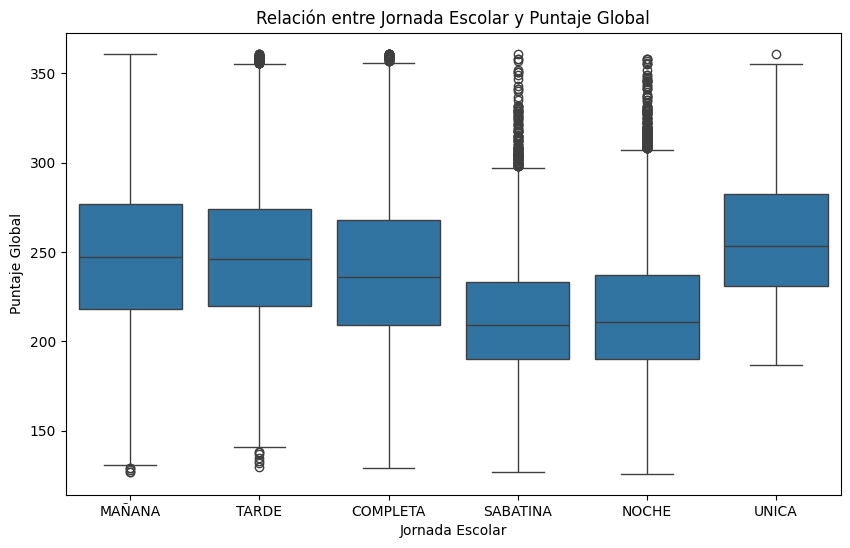

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear una nueva variable que represente la jornada escolar
# 0 - Sin especificar, 1 - COMPLETA, 2 - MAÑANA, 3 - NOCHE, 4 - SABATINA, 5 - TARDE, 6 - UNICA
df['jornada_escolar'] = df['jornada_COMPLETA'] * 1 + df['jornada_MAÑANA'] * 2 + df['jornada_NOCHE'] * 3 + df['jornada_SABATINA'] * 4 + df['jornada_TARDE'] * 5 + df['jornada_UNICA'] * 6

# Mapear los valores de la jornada escolar a los nombres de las jornadas
nombres_jornadas = {
    1: 'COMPLETA',
    2: 'MAÑANA',
    3: 'NOCHE',
    4: 'SABATINA',
    5: 'TARDE',
    6: 'UNICA'
}
df['jornada_escolar'] = df['jornada_escolar'].map(nombres_jornadas)

# Crear el gráfico de cajas
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='jornada_escolar', y='punt_global')

# Configurar el gráfico
plt.xlabel('Jornada Escolar')
plt.ylabel('Puntaje Global')
plt.title('Relación entre Jornada Escolar y Puntaje Global')

# Mostrar el gráfico
plt.show()


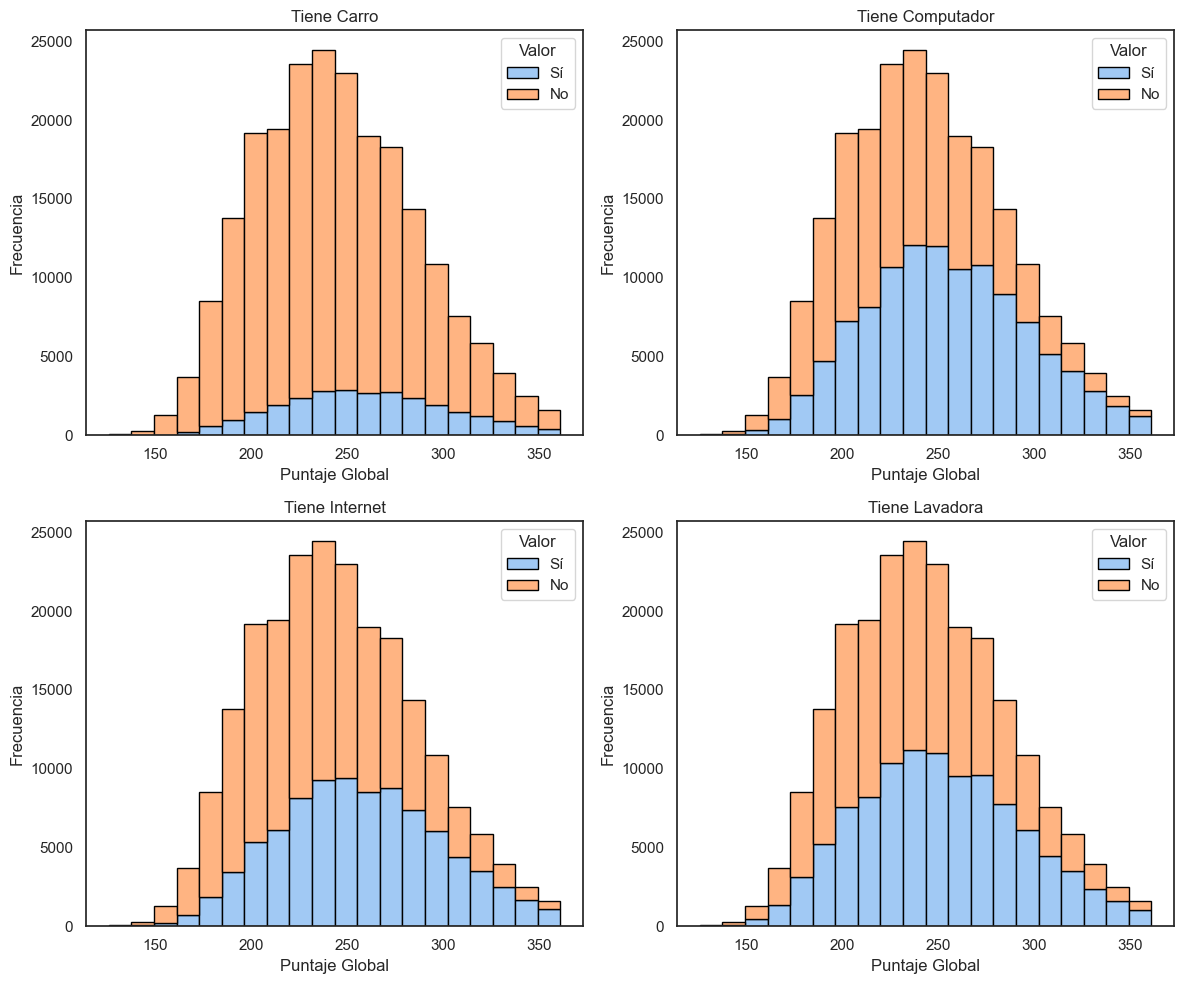

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Definir una paleta de colores más suave con dos colores
colors = sns.color_palette("pastel", 2)

# Crear subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Variables binarias de interés y sus nombres actualizados
binary_variables = {
    'fami_tieneautomovil': 'Tiene Carro',
    'fami_tienecomputador': 'Tiene Computador',
    'fami_tieneinternet': 'Tiene Internet',
    'fami_tienelavadora': 'Tiene Lavadora'
}

# Iterar sobre las variables binarias y sus respectivos subplots
for i, (variable, nombre) in enumerate(binary_variables.items()):
    # Filtrar datos cuando la variable binaria es 1 y 0
    data_1 = df[df[variable] == 1]['punt_global']
    data_0 = df[df[variable] == 0]['punt_global']
    
    # Crear histogramas apilados
    axs[i//2, i%2].hist([data_1, data_0], bins=20, stacked=True, color=colors, edgecolor='black', label=['Sí', 'No'])
    
    # Configurar títulos y etiquetas
    axs[i//2, i%2].set_title(f'{nombre}')
    axs[i//2, i%2].set_xlabel('Puntaje Global')
    axs[i//2, i%2].set_ylabel('Frecuencia')
    axs[i//2, i%2].legend(title='Valor', loc='upper right')
    axs[i//2, i%2].grid(False)

# Ajustar el espaciado entre subplots
plt.tight_layout()

# Mostrar el gráfico
plt.show()


## Periodo

In [ ]:
print(df['periodo'].value_counts(dropna=False))

periodo
20142    75047
20162    73254
20152    73035
Name: count, dtype: int64


departamento       CAUCA       CHOCO      NARIÑO       VALLE
periodo                                                     
20142         233.867853  218.917171  247.517653  245.182426
20152         232.057812  215.701684  247.969945  244.577483
20162         239.977868  219.955227  256.280859  253.459251


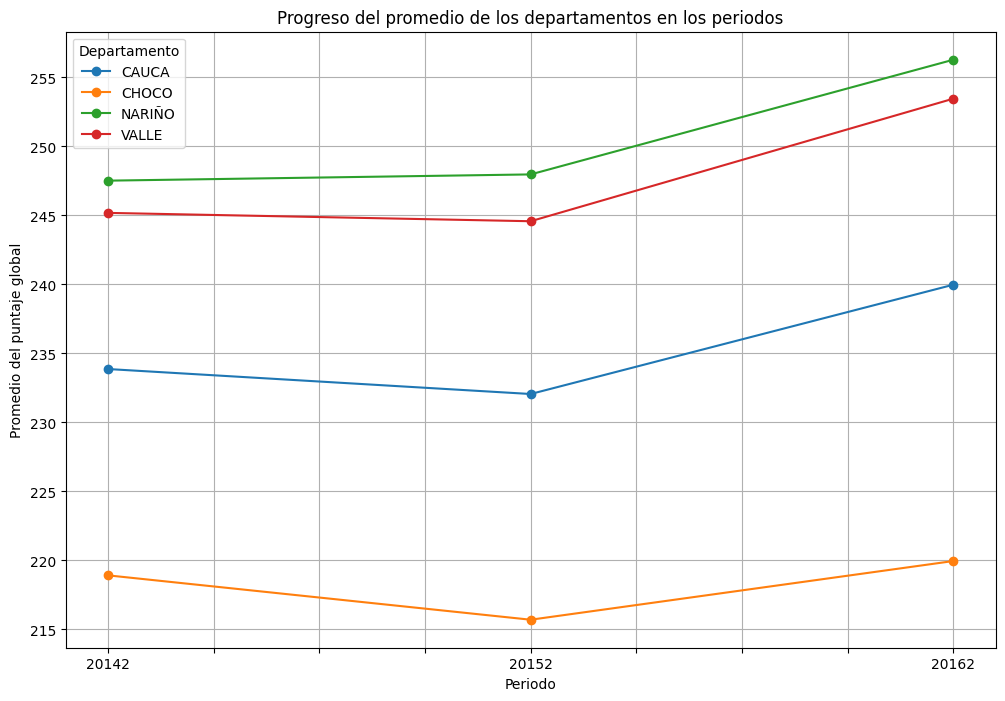

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Supongamos que tienes un DataFrame llamado 'df' que contiene los datos
# Crear una columna categórica 'departamento' basada en las variables binarias
df_nuevo = df.copy()
df_nuevo['departamento'] = df_nuevo.apply(
    lambda row: 'CAUCA' if row['cole_depto_ubi_CAUCA'] == 1 else
                'CHOCO' if row['cole_depto_ubi_CHOCO'] == 1 else
                'NARIÑO' if row['cole_depto_ubi_NARIÑO'] == 1 else
                'VALLE' if row['cole_depto_ubi_VALLE'] == 1 else
                'Otros',
    axis=1
)


# Convertir la columna periodo a tipo de datos categórico
df_nuevo['periodo'] = df_nuevo['periodo'].astype('category')

# Convertir los valores de la columna periodo de entero a cadena (string)
df_nuevo['periodo'] = df_nuevo['periodo'].astype(str)

# Ahora puedes continuar con el análisis o visualización de los datos

# Calcular el promedio por departamentos en cada periodo
promedio_por_departamento_periodo = df_nuevo.groupby(['periodo', 'departamento'])['punt_global'].mean().reset_index()

# Crear un DataFrame con los promedios
promedio_df = pd.pivot_table(promedio_por_departamento_periodo, values='punt_global', index='periodo', columns='departamento')
print(promedio_df)

# Graficar el progreso del promedio de los departamentos en los periodos
promedio_df.plot(kind='line', marker='o', figsize=(12, 8))
plt.title('Progreso del promedio de los departamentos en los periodos')
plt.xlabel('Periodo')
plt.ylabel('Promedio del puntaje global')
plt.grid(True)
plt.legend(title='Departamento')
plt.show()


In [ ]:
# Filtrar los datos para periodo "20161" y departamento "CHOCO"
datos_20161_choco = df_nuevo[(df_nuevo['periodo'] == '20161') & (df_nuevo['departamento'] == 'CHOCO')]

# Mostrar los datos resultantes
print(datos_20161_choco)


Empty DataFrame
Columns: [periodo, estu_consecutivo, cole_area_ubicacion, cole_calendario, cole_naturaleza, estu_genero, fami_cuartoshogar, fami_estratovivienda, fami_personashogar, fami_tieneautomovil, fami_tienecomputador, fami_tieneinternet, fami_tienelavadora, punt_ingles, punt_matematicas, punt_sociales_ciudadanas, punt_c_naturales, punt_lectura_critica, punt_global, edad, caracter_ACADÉMICO, caracter_TÉCNICO, caracter_TÉCNICO/ACADÉMICO, cole_depto_ubi_CAUCA, cole_depto_ubi_CHOCO, cole_depto_ubi_NARIÑO, cole_depto_ubi_VALLE, generoCole_FEMENINO, generoCole_MASCULINO, generoCole_MIXTO, jornada_COMPLETA, jornada_MAÑANA, jornada_NOCHE, jornada_SABATINA, jornada_TARDE, jornada_UNICA, madre_Educación profesional completa, madre_Educación profesional incompleta, madre_Ninguno, madre_No sabe, madre_Postgrado, madre_Primaria completa, madre_Primaria incompleta, madre_Secundaria (Bachillerato) completa, madre_Secundaria (Bachillerato) incompleta, madre_Técnica o tecnológica completa, madre